In [1]:
import matplotlib.ft2font

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [2]:
#!python
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [4]:
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Helvetica'

In [5]:
import matplotlib.pyplot as pl
from matplotlib.ticker import FormatStrFormatter
#from matplotlib import rcParams

In [6]:
%matplotlib inline

In [7]:
d = pd.read_excel('./Data SO figures.xlsx')

In [8]:
d.rename({'Year': 'date'}, axis=1, inplace=True)

In [9]:
d.drop('M', inplace=True, axis=1)

In [10]:
d.set_index('date', inplace=True)

In [11]:
d.head().T

date,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00
#,1.000000,2.000000,3.000000,4.000000,5.000000
SAM,0.690000,-1.780000,-3.170000,-0.890000,2.650000
AAO,0.122000,-0.595000,-1.905000,-0.835000,0.413000
IOSTZ,0.243960,0.238010,0.224750,0.223030,0.173660
IOSOSTZ,0.194640,0.185670,0.215620,0.266770,0.233000
POSTZ,0.237650,0.254290,0.220350,0.195630,0.163820
POSOSTZ,0.156770,0.156240,0.206760,0.435610,0.309700
AOSTZ,0.352950,0.335790,0.318700,0.273450,0.257990
AOSOSTZ,0.212130,0.245240,0.315550,0.615800,0.466430
IOPOOZ,0.180950,0.195581,0.221278,0.275540,0.199565


In [12]:
d.rename({k:k.strip() for k in d.columns}, axis=1, inplace=True)

In [13]:
d.columns.tolist()

['#',
 'SAM',
 'AAO',
 'IOSTZ',
 'IOSOSTZ',
 'POSTZ',
 'POSOSTZ',
 'AOSTZ',
 'AOSOSTZ',
 'IOPOOZ',
 'POPOOZ',
 'AOPOOZ',
 'IOSAAZ',
 'POSAAZ',
 'AOSAAZ']

In [14]:
col1_names= ['AOSAAZ', 'IOSAAZ', 'POSAAZ']
col2_names = ['AOPOOZ', 'IOPOOZ', 'POPOOZ']
col3_names = ['IOSTZ', 'POSTZ', 'AOSTZ']

In [15]:
d_ = d.loc[:, col1_names + col2_names + col3_names]

In [16]:
d_.loc[d_.IOPOOZ>1, 'IOPOOZ'] = np.NaN

In [17]:
d_.loc[d_.IOPOOZ>1]

,AOSAAZ,IOSAAZ,POSAAZ,AOPOOZ,IOPOOZ,POPOOZ,IOSTZ,POSTZ,AOSTZ
date,,,,,,,,,


In [18]:
d_.head()

,AOSAAZ,IOSAAZ,POSAAZ,AOPOOZ,IOPOOZ,POPOOZ,IOSTZ,POSTZ,AOSTZ
date,,,,,,,,,
1997-09-01,0.28457,0.19830,0.16906,0.194558,0.180950,0.154737,0.24396,0.23765,0.35295
1997-10-01,0.35077,0.20853,0.15947,0.235877,0.195581,0.163974,0.23801,0.25429,0.33579
1997-11-01,0.45735,0.25616,0.17670,0.277545,0.221278,0.232293,0.22475,0.22035,0.31870
1997-12-01,0.44453,0.24011,0.18865,0.388892,0.275540,0.301326,0.22303,0.19563,0.27345
1998-01-01,0.43567,0.21664,0.13944,0.371978,0.199565,0.194234,0.17366,0.16382,0.25799


/Users/erdemk/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/erdemk/anaconda3/envs/machine_learning/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/erdemk/anaconda3/envs/machine_learning/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[

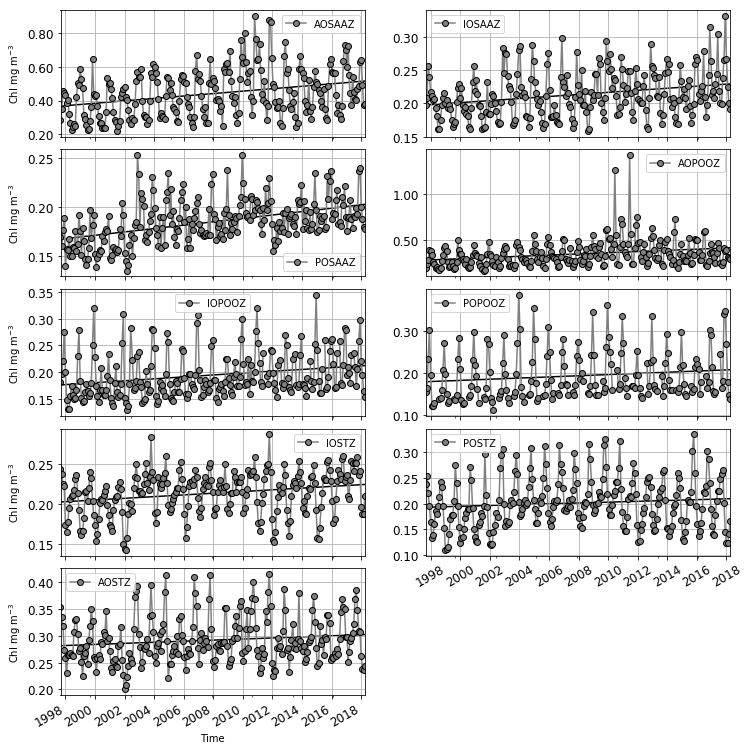

In [19]:
f, axs = pl.subplots(nrows=5, ncols=2, sharex=True,
                     figsize=(12, 14))
cols = d_.columns

lrs = {k: LR() for k in cols}
for ax, col in zip(axs.flat, cols):
    y = d_[col].dropna().values.reshape(-1, 1)
    x = np.arange(y.size).reshape(-1, 1)
    lrs[col].fit(x, y)
    y_mod = lrs[col].predict(x)
    ax.plot(d_[col].dropna().index, y_mod, 'k', zorder=0)
    #ax.plot(d_[col].dropna().index, d_[col].dropna().values)
    d_.plot(y=col, ax=ax, marker='o', color='gray', markeredgecolor='k' )
    ax.grid()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xlabel('')
#labels = [i.get_text() for i in axs[-2].get_xticklabels()]
#axs[-3].set_xticklabels(labels)
#f.delaxes(axs[-1])
#pl.setp(axs[3][1].get_xticklabels(), visible=True)
axs[3][1].xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=30)
axs[4][0].set_xlabel('Time', fontname='Helvetica')
axs[3][1].set_xlabel('Time', fontname='Helvetica')
for i in range(5):
    axs[i][0].set_ylabel(r'Chl mg m$^{-3}$',)
f.delaxes(axs.flat[-1])
pl.subplots_adjust(hspace=0.1)
#f.tight_layout()
#f.savefig('./fig23_combined_v1.png', dpi=300)
#f.savefig('./fig23_combined_v2.png', dpi=300)
#f.savefig('./fig23_combined_v2.pdf', dpi=300)
#f.savefig('./fig23_combined_v3.png', dpi=300)
#f.savefig('./fig23_combined_v1.svg')
#f.savefig('./fig23_combined_v1.pdf', dpi=300)